In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Utils.analyse import Analyser
from statsmodels.tsa.seasonal import seasonal_decompose

## Extração de dados

In [34]:
f = 'AirQuality/AirQualityUCI.csv'

In [35]:
df = pd.read_csv(f, sep=';')

In [36]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [38]:
data = df['PT08.S1(CO)'].dropna()
data = data[np.where(data > 0)[0]]
data.describe()

count    8991.000000
mean     1099.833166
std       217.080037
min       647.000000
25%       937.000000
50%      1063.000000
75%      1231.000000
max      2040.000000
Name: PT08.S1(CO), dtype: float64

## Análise

In [62]:
an = Analyser(data[:170], freq=24)

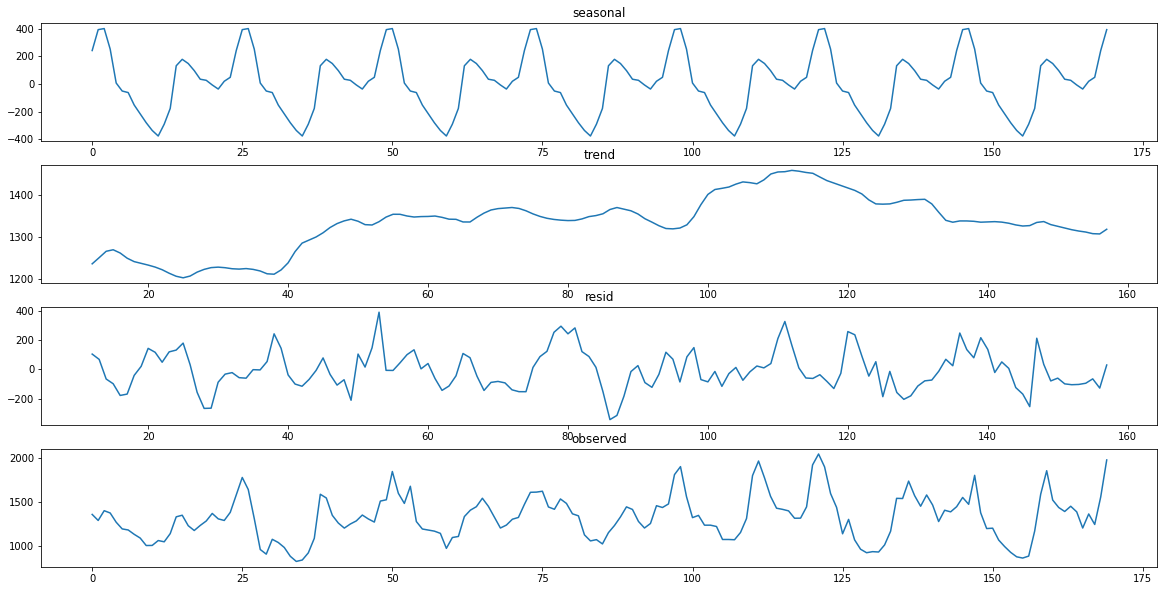

In [63]:
l = ['seasonal', 'trend', 'resid', 'observed']
g = an.plot_decomposition(*l, figsize=(20,10));

In [64]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



In [65]:
an.homoscedasticity()

,Dataset,Levene Statistic,p-value,Result,Cedasticidade
0,DATA,4.061645,0.045462,H0 Rejected,Heterocedástica


In [66]:
an.stationarity()

,Dataset,ADF Statistic,p-value,Result,Estacionariedade
0,DATA,-5.655994,9.618284e-07,H0 Rejected,Estacionária


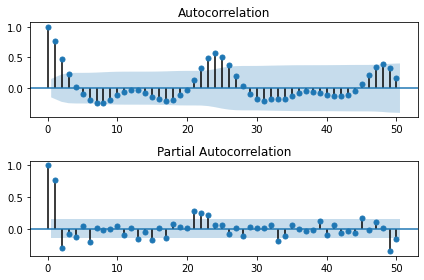

In [69]:
an.acf(lags=50);

## Análise semanal

In [70]:
df_semana = df.groupby('Date').mean()

In [71]:
df_semana

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,
01/01/2005,1114.250000,-200.000,853.791667,268.583333,782.458333,101.041667,1032.625000,1226.416667,NaN,NaN
01/02/2005,1250.166667,-200.000,1016.583333,472.750000,644.791667,147.833333,1184.416667,1559.083333,NaN,NaN
01/03/2005,820.166667,-200.000,618.916667,166.750000,1191.833333,86.958333,699.083333,482.708333,NaN,NaN
01/04/2004,1063.833333,310.125,859.125000,146.250000,745.583333,84.375000,1413.833333,986.375000,NaN,NaN
01/04/2005,903.291667,-200.000,663.000000,161.833333,946.875000,107.333333,943.250000,523.958333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
31/05/2004,1007.000000,-200.000,977.125000,102.541667,974.458333,80.875000,1663.333333,868.250000,NaN,NaN
31/07/2004,989.750000,-200.000,888.958333,83.875000,729.125000,85.541667,1580.958333,822.791667,NaN,NaN
31/08/2004,1070.333333,-200.000,980.791667,-51.875000,692.333333,-89.291667,1684.958333,928.916667,NaN,NaN


In [72]:
data = df_semana['PT08.S1(CO)'].dropna()
data = data[np.where(data > 0)[0]]
data.describe()

count     382.000000
mean     1078.832439
std       183.194120
min         8.833333
25%       982.729167
50%      1086.625000
75%      1191.166667
max      1513.291667
Name: PT08.S1(CO), dtype: float64

In [79]:
an = Analyser(data[:170], freq=14, name='Semana')

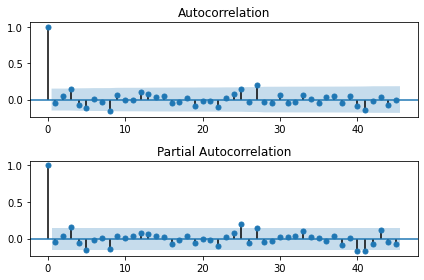

In [87]:
an.acf(lags=45)

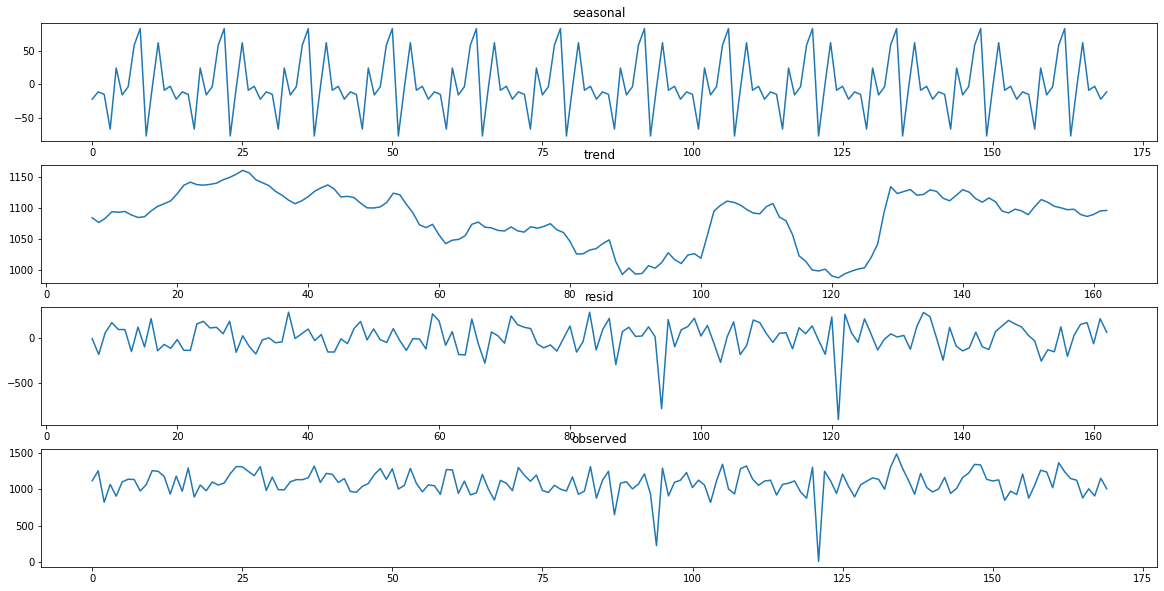

In [81]:
g = an.plot_decomposition(*l, figsize=(20,10));

In [82]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras são iguais 



In [83]:
an.homoscedasticity()

,Dataset,Levene Statistic,p-value,Result,Cedasticidade
0,Semana,2.478634,0.117284,H0 Accepted,Homocedástica


In [84]:
an.stationarity()

,Dataset,ADF Statistic,p-value,Result,Estacionariedade
0,Semana,-6.188869,6.192698e-08,H0 Rejected,Estacionária
